## Análise Exploratória de Dados de E-commerce

A análise a seguir foi desenvolvida a partir de um conjunto de dados de e-commerce disponibilizado na plataforma Kaggle, disponível em: https://www.kaggle.com/datasets/jockeroika/ecommerce-data 

O objetivo deste projeto é explorar e compreender fatores relevantes no contexto de e-commerce, como produtos mais vendidos, os itens que geram maior faturamento, o comportamento temporal das vendas, além do desempenho da plataforma por cidade. 

Para isso, foi realizada uma Análise Exploratória de Dados (EDA) utilizando Python com o apoio das bibliotecas Pandas, Matplotlib e Seaborn. A Análise busca identificar padrões, tendências e possíveis oportunidades de negócio a partir dos dados disponíveis. 

Hipóteses Analisadas:

- Produtos com maior volume de vendas não necessariamente são os que geram maior faturamento.

- O faturamento do e-commerce apresenta variações ao longo do ano, indicando possíveis padrões de sazonalidade.

- Existem diferenças no comportamento de compra entre os dias da semana, com dias específicos concentrando maior faturamento.

- As plataformas de venda (Souq, Jumia e Amazon) apresentam desempenhos distintos em termos de volume de vendas e ticket médio.

- Algumas cidades concentram maior número de pedidos, enquanto outras se destacam pelo maior faturamento total, indicando diferenças no perfil de consumo regional.


## 1) Importando bibliotecas e dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("data/ecommerce_10000.csv")
df

,OrderID,Product,Category,Brand,Platform,City,Price,Quantity,TotalAmount,Rating,Reviews,OrderDate
0,ORD100000,Samsung Galaxy A14,Electronics,Samsung,Souq,Cairo,16284.02,1,16284.02,1.39,1684,2024-11-11
1,ORD100001,Nike Air Max,Fashion,Nike,Jumia,Alexandria,6645.20,2,13290.40,2.56,3604,2024-06-22
2,ORD100002,Bluetooth Headset,Accessories,JBL,Jumia,Casablanca,8882.92,3,26648.76,4.98,1257,2024-05-27
3,ORD100003,HP Pavilion Laptop,Computers,HP,Souq,Dubai,3665.44,1,3665.44,1.44,662,2024-07-25
4,ORD100004,iPhone 13,Electronics,Apple,Souq,Casablanca,5210.37,2,10420.74,3.73,2424,2024-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ORD109995,HP Pavilion Laptop,Computers,HP,Jumia,Riyadh,3571.93,1,3571.93,1.05,2154,2024-05-21
9996,ORD109996,Adidas Running Shoes,Fashion,Adidas,Souq,Cairo,2974.55,4,11898.20,2.60,1796,2024-11-27
9997,ORD109997,Adidas Running Shoes,Fashion,Adidas,Amazon,Riyadh,8646.20,1,8646.20,3.20,4001,2024-10-15
9998,ORD109998,T-shirt Cotton,Fashion,Generic,Amazon,Riyadh,4960.53,4,19842.12,3.42,685,2024-04-26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      10000 non-null  object 
 1   Product      10000 non-null  object 
 2   Category     10000 non-null  object 
 3   Brand        10000 non-null  object 
 4   Platform     10000 non-null  object 
 5   City         10000 non-null  object 
 6   Price        10000 non-null  float64
 7   Quantity     10000 non-null  int64  
 8   TotalAmount  10000 non-null  float64
 9   Rating       10000 non-null  float64
 10  Reviews      10000 non-null  int64  
 11  OrderDate    10000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 937.6+ KB


- A coluna OrderDate está como "object" e por se tratar de tempo, o ideal seria "datetime" para facilitar análises temporais. Isso será resolvido na etapa de limpeza de dados. 

In [4]:
df.describe()

,Price,Quantity,TotalAmount,Rating,Reviews
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10027.986331,3.006200,30199.572439,3.005592,2520.072200
std,5728.261196,1.415472,23861.789828,1.154845,1443.849734
min,105.590000,1.000000,113.550000,1.000000,0.000000
25%,4999.862500,2.000000,11066.910000,2.010000,1275.000000
50%,10063.600000,3.000000,23671.630000,3.005000,2537.500000
75%,14938.430000,4.000000,44648.580000,4.000000,3767.000000
max,19999.340000,5.000000,99993.800000,5.000000,5000.000000


## 2) Limpeza de dados

Como citado anteriormente, a coluna OrderDate precisa ser convertida para o formato "datetime" para facilitar análise temporais, facilitando na visualização de tendências, sazonalidade e crescimento.

In [5]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [6]:
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['Day'] = df['OrderDate'].dt.day
df['Weekday'] = df['OrderDate'].dt.day_name()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      10000 non-null  object        
 1   Product      10000 non-null  object        
 2   Category     10000 non-null  object        
 3   Brand        10000 non-null  object        
 4   Platform     10000 non-null  object        
 5   City         10000 non-null  object        
 6   Price        10000 non-null  float64       
 7   Quantity     10000 non-null  int64         
 8   TotalAmount  10000 non-null  float64       
 9   Rating       10000 non-null  float64       
 10  Reviews      10000 non-null  int64         
 11  OrderDate    10000 non-null  datetime64[ns]
 12  Year         10000 non-null  int32         
 13  Month        10000 non-null  int32         
 14  Day          10000 non-null  int32         
 15  Weekday      10000 non-null  object        
dtypes: da

In [41]:
# Verificando a presença de valores nulos por coluna
print("Valores Nulos por Coluna:")
df.isnull().sum()

Valores Nulos por Coluna:


OrderID        0
Product        0
Category       0
Brand          0
Platform       0
City           0
Price          0
Quantity       0
TotalAmount    0
Rating         0
Reviews        0
OrderDate      0
Year           0
Month          0
Day            0
Weekday        0
dtype: int64

In [42]:
# Verificando a presença de linhas duplicadas
total_duplicados = df.duplicated().sum()

print(f"Total de Registros Duplicados: {total_duplicados}")

Total de Registros Duplicados: 0


## 3) Análises iniciais

### Produtos mais vendidos

In [10]:
# produtos mais vendidos (por quantidade)
top_produtos = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)
top_produtos


Product
Xiaomi Redmi Note 12    3187
Smartwatch FitPro       3111
Samsung Galaxy A14      3056
Bluetooth Headset       3043
Nike Air Max            3040
T-shirt Cotton          3036
HP Pavilion Laptop      2979
Dell Inspiron 3501      2913
Adidas Running Shoes    2904
iPhone 13               2793
Name: Quantity, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_8412\791392048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


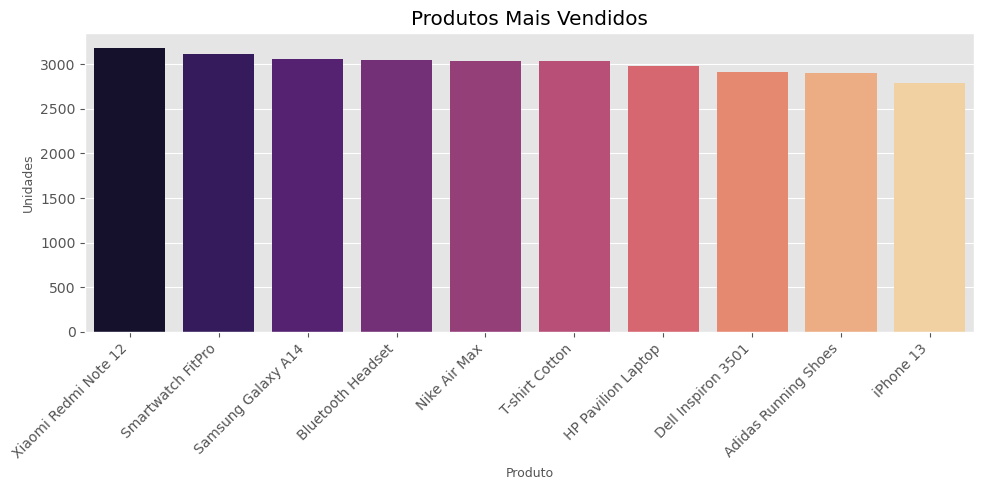

In [43]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x=top_produtos.index,
    y=top_produtos.values,
    palette='magma'
)

plt.title('Produtos Mais Vendidos')
plt.xlabel('Produto', size=9)
plt.ylabel('Unidades', size=9)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Produtos que mais geram faturamento

In [39]:
produtos_faturamento = df.groupby('Product')['TotalAmount'].sum().sort_values(ascending=False)
produtos_faturamento

Product
Xiaomi Redmi Note 12    33772598.37
Smartwatch FitPro       31420413.20
Nike Air Max            30727637.51
T-shirt Cotton          30507500.40
Adidas Running Shoes    30269021.82
Samsung Galaxy A14      30004263.23
HP Pavilion Laptop      29482727.14
Bluetooth Headset       29200970.13
iPhone 13               28550322.17
Dell Inspiron 3501      28060270.42
Name: TotalAmount, dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_8412\2562978409.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


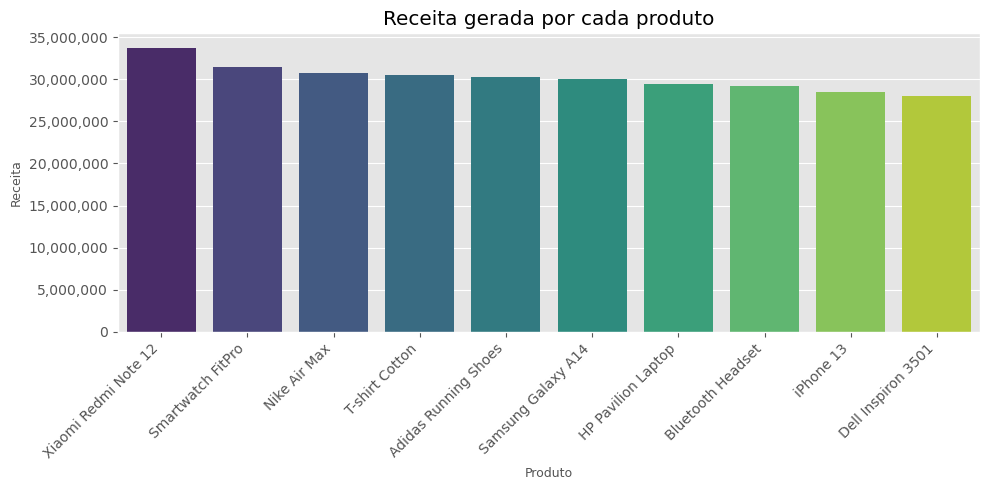

In [44]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x=produtos_faturamento.index,
    y=produtos_faturamento.values,
    palette='viridis'
)

plt.title('Receita gerada por cada produto')
plt.xlabel('Produto', size=9)
plt.ylabel('Receita', size=9)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Vendas mensais

In [15]:
# vendas por mês
vendas_mes = df.groupby('Month')['TotalAmount'].sum()
vendas_mes

Month
1     26425904.77
2     23199060.32
3     25599416.15
4     24950410.65
5     26286508.96
6     23649020.33
7     26801658.28
8     25264031.98
9     26498388.36
10    25713673.72
11    25660914.18
12    21946736.69
Name: TotalAmount, dtype: float64

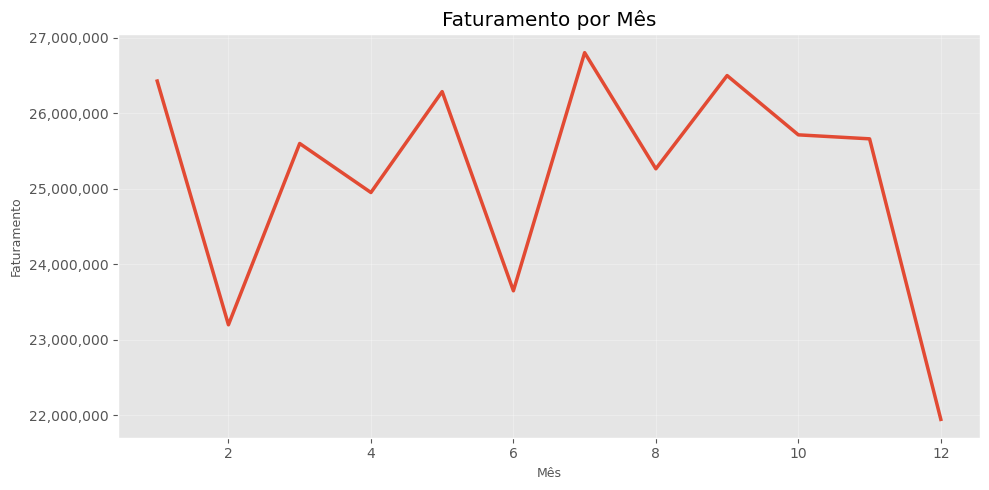

In [35]:
plt.figure(figsize=(10,5))
plt.plot(vendas_mes.index, vendas_mes.values, linewidth=2.5)
plt.title('Faturamento por Mês')
plt.xlabel('Mês', size=9)
plt.ylabel('Faturamento', size=9)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

O faturamento apresentou oscilações ao longo do ano, com quedas relativas nos meses de fevereiro, junho e dezembro, sendo dezembro o período de menor desempenho. Em contrapartida, janeiro, maio e setembro se destacam como meses de maior faturamento. Esse comportamento pode estar relacionado a fatores sazonais, como o adiamento de compras após o período de fim de ano ou maior propensão ao consumo no início do ano, quando os consumidores tendem a reorganizar seus gastos.

### Vendas diárias

In [17]:
# vendas por dias da semana
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

vendas_dia = df.groupby('Weekday')['TotalAmount'].sum().reindex(ordem_dias)
vendas_dia

Weekday
Monday       42412368.99
Tuesday      44558943.92
Wednesday    45005329.90
Thursday     42597180.99
Friday       41560947.92
Saturday     41933787.53
Sunday       43927165.14
Name: TotalAmount, dtype: float64

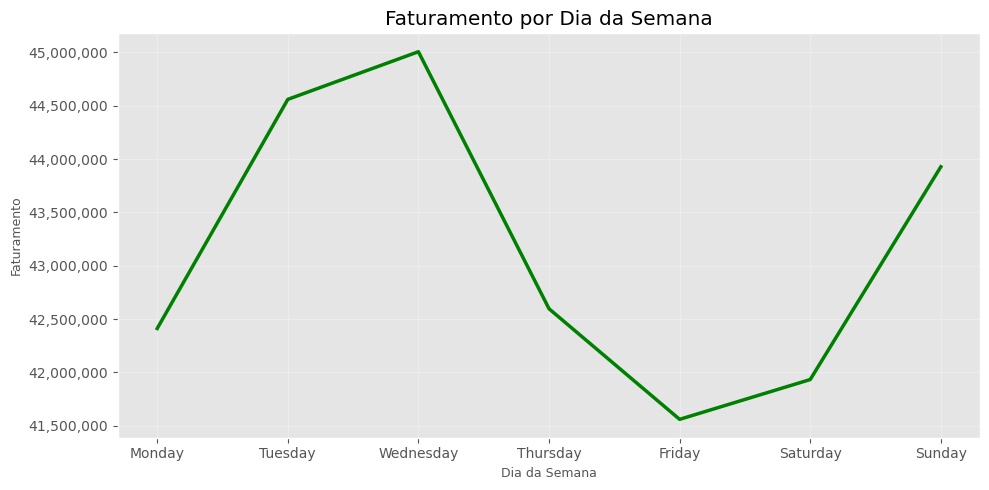

In [34]:
plt.figure(figsize=(10,5))
plt.plot(vendas_dia.index, vendas_dia.values, linewidth=2.5, color='green')
plt.title('Faturamento por Dia da Semana')
plt.xlabel('Dia da Semana', size=9)
plt.ylabel('Faturamento', size=9)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))


plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

A análise por dia da semana mostra que a sexta-feira apresenta o menor faturamento, enquanto a quarta-feira se destaca como o dia de melhor desempenho. Esse padrão sugere uma maior concentração de compras no meio da semana, possivelmente associada ao comportamento do consumidor ou a estratégias promocionais específicas.

### Plataforma que mais vende

In [20]:
# quantidade de unidades vendidas por plataforma
vendas_plataforma = df.groupby('Platform')['Quantity'].sum().sort_values(ascending=False)
vendas_plataforma

Platform
Jumia     10105
Souq      10101
Amazon     9856
Name: Quantity, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_8412\2828251764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


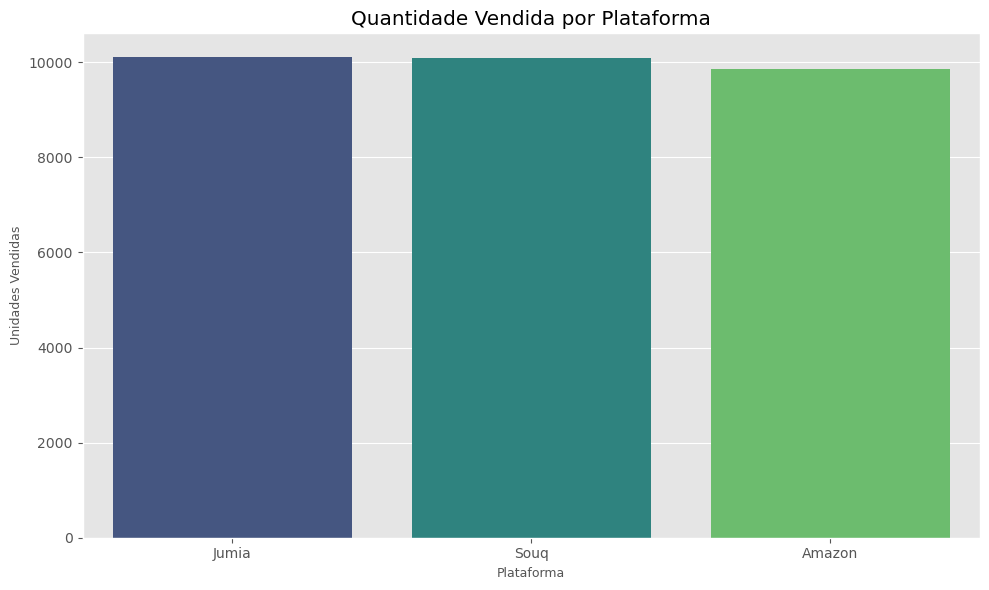

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=vendas_plataforma.index,
    y=vendas_plataforma.values,
    palette='viridis', 
    dodge=False,
    legend=False

)
plt.title('Quantidade Vendida por Plataforma')
plt.xlabel('Plataforma', size=9)
plt.ylabel('Unidades Vendidas', size=9)
plt.tight_layout()

plt.show()


### Ticket Médio por plataforma

In [24]:
# número pedidos por plataforma
pedidos_plataforma = df.groupby('Platform')['OrderID'].count().sort_values(ascending=False)
pedidos_plataforma

Platform
Souq      3371
Jumia     3341
Amazon    3288
Name: OrderID, dtype: int64

In [25]:
# ticket médio por plataforma (tm = valor médio gasto por pedido)
tm_plataforma = faturamento_plataforma / pedidos_plataforma
tm_plataforma.sort_values(ascending=False)

Platform
Jumia     30439.111793
Souq      30234.641688
Amazon    29920.217384
dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_8412\3150400967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tm_plataforma.index, y=tm_plataforma.values, palette='magma')


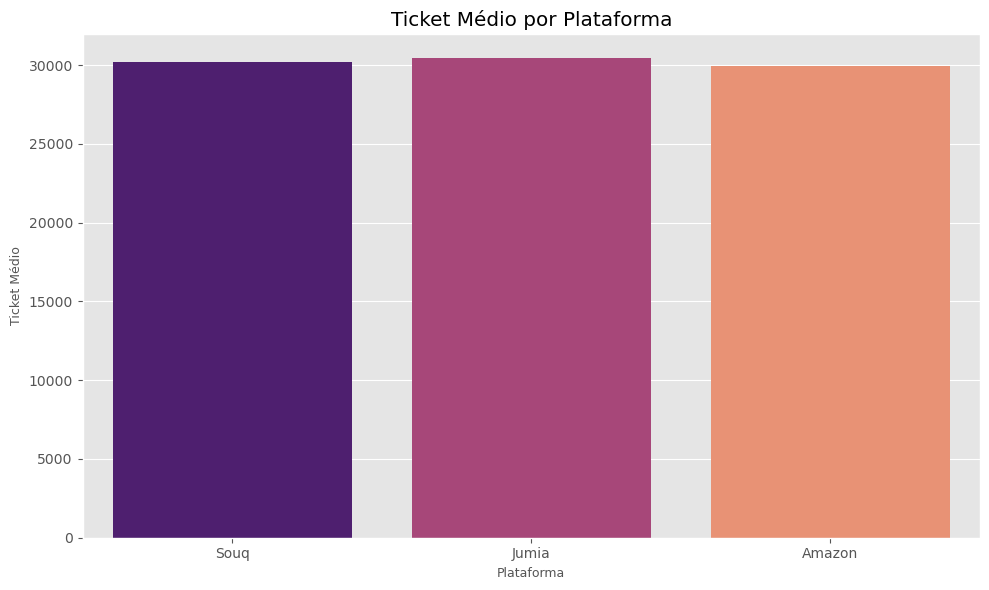

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=tm_plataforma.index, y=tm_plataforma.values, palette='magma')

plt.title("Ticket Médio por Plataforma")
plt.xlabel("Plataforma", size=9)
plt.ylabel("Ticket Médio", size=9)
plt.tight_layout()
plt.show()

A análise por plataforma revela diferenças sutis, porém relevantes, no desempenho dos canais de e-commerce. A Jumia se destaca como a plataforma com maior volume de unidades vendidas, além de apresentar o maior ticket médio, indicando um valor médio de compra ligeiramente superior por pedido. Por outro lado, a Souq lidera em faturamento total, sugerindo uma combinação eficiente entre volume de vendas e valor dos produtos comercializados. A Amazon apresenta desempenho próximo às demais plataformas nos três indicadores analisados, demonstrando competitividade consistente, embora com menor destaque relativo.

### Categorias de produtos que mais geram receita

In [30]:
receita_categoria = (
    df.groupby('Category')['TotalAmount']
    .sum()
    .sort_values(ascending=False)
)

receita_categoria


Category
Electronics    92327183.77
Fashion        91504159.73
Computers      57542997.56
Wearables      31420413.20
Accessories    29200970.13
Name: TotalAmount, dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_8412\111438932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


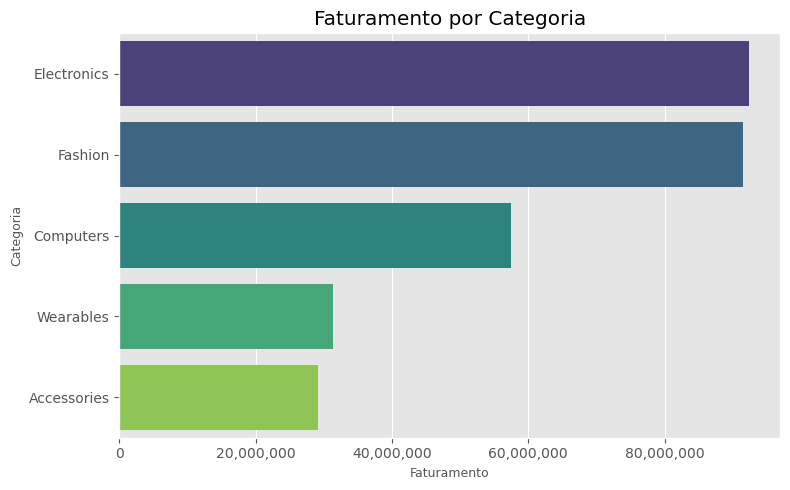

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=receita_categoria.values,
    y=receita_categoria.index,
    palette='viridis'
)

plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))


plt.title('Faturamento por Categoria')
plt.xlabel('Faturamento', size=9)
plt.ylabel('Categoria', size=9)
plt.tight_layout()
plt.show()


### Ticket Médio por cidade

In [32]:
ticket_cidade = (
    df.groupby('City')
    .agg(
        faturamento=('TotalAmount', 'sum'),
        pedidos=('OrderID', 'count')
    )
)

ticket_cidade['ticket_medio'] = ticket_cidade['faturamento'] / ticket_cidade['pedidos']
ticket_cidade.sort_values('ticket_medio', ascending=False)


,faturamento,pedidos,ticket_medio
City,,,
Casablanca,52382993.51,1689,31014.205749
Cairo,52522076.73,1705,30804.737085
Giza,48704335.49,1622,30027.333841
Riyadh,50364375.88,1679,29996.650316
Dubai,49177483.79,1648,29840.706183
Alexandria,48844458.99,1657,29477.645739


C:\Users\PC\AppData\Local\Temp\ipykernel_8412\2569114812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


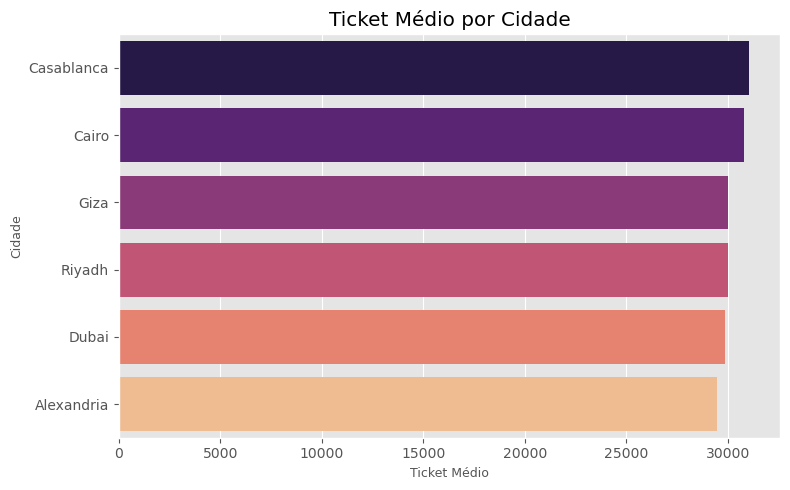

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(
    y=ticket_cidade.sort_values('ticket_medio', ascending=False).index,
    x=ticket_cidade.sort_values('ticket_medio', ascending=False)['ticket_medio'],
    palette='magma'
)
plt.title('Ticket Médio por Cidade')
plt.xlabel('Ticket Médio', size=9)
plt.ylabel('Cidade', size=9)
plt.tight_layout()
plt.show()


A análise de receita revela diferenças relevantes entre cidades e categorias de produtos. Casablanca e Cairo se destacam com o maior ticket médio, indicando que os consumidores dessas localidades gastam mais por pedido, mesmo que o volume de pedidos seja semelhante a outras cidades. Entre as categorias, Electronics e Fashion concentram a maior parte do faturamento, mostrando que produtos de tecnologia e moda representam a base da receita do e-commerce. Esses insights podem orientar estratégias de marketing e estoque, priorizando produtos e regiões de maior retorno financeiro.

## Considerações Finais

- A Análise Exploratória de Dados permitiu identificar padrões relevantes no comportamento de vendas do e-commerce, destacando diferenças entre quantidade vendida, faturamento e ticket médio.

- Observou-se que produtos com maior quantidade vendida nem sempre são os que geram maior receita, reforçando a importância de análises financeiras complementares. É crucial priorizar o foco em marketing e ter estoque para os produtos que mais contribuem para o faturamento total, usando os itens de alto volume para sugerir a compra de produtos mais caros (de maior lucro) no mesmo pedido.

- As análises temporais indicaram variações ao longo do ano e da semana, sugerindo possíveis efeitos sazonais e comportamentais. Recomenda-se planejar e preparar o estoque antes dos meses de pico (janeiro, maio, setembro) e concentrar campanhas de vendas nas terças e quartas-feiras para maximizar o número de pedidos.

- As plataformas apresentaram desempenhos distintos, com diferenças sutis, porém relevantes, entre volume e valor médio por pedido. Deve-se priorizar o investimento em publicidade na plataforma Souq (maior faturamento). A Jumia, por liderar o valor médio de compra, deve ter sua estratégia de produtos de alto valor identificada e replicada para as demais plataformas.

- Por fim, a análise por cidade revelou perfis de consumo regionais distintos, evidenciando oportunidades para estratégias mais segmentadas. Sugere-se focar em atrair mais clientes em Cairo e desenvolver campanhas exclusivas e de fidelidade em Casablanca, aproveitando o maior valor gasto por pedido nesta cidade.